# **1. Pytorch**

* Pytorch는 tensorflow와 함께 딥러닝에서 가장 널리 사용되는 framework이다.
* 초기에는 Torch라는 이름으로 Lua언어 기반으로 만들어졌으나, 이후 python기반으로 변경한 것이다.
* NewYork 대학교와 Facebook이 공동으로 만들었고, 가장 대중적으로 널리 사용되는
framework이다.


# **2. Pytorch import**

In [15]:
import torch
print(torch.__version__) 

1.10.0+cu111


### **2-1. Tensor**

* 텐서(tensor)는 배열(array)이나 행렬(matrix)과 매우 유사한 특수 자료구조이다. 
* Pytorch에서는 텐서를 사용하여 모델의 입력(input)과 출력(output), 그리고 모델의 매개변수들을 부호화(encode)한다.

In [16]:
# list로부터 직접 tensor 생성하기
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [17]:
import numpy as np

In [18]:
# numpy array로부터 tensor 생성
np_array = np.array(data)
x_np_1 = torch.tensor(np_array) # 카피본을 만드는 것(새로운 텐서, 메모리 낭비)
print(x_np_1)

tensor([[1, 2],
        [3, 4]])


In [19]:
x_np_2 = torch.as_tensor(np_array) # 뷰를 만드는 것
print(x_np_2)


tensor([[1, 2],
        [3, 4]])


In [20]:
x_np_3 = torch.from_numpy(np_array) # 뷰를 만드는 것
print(x_np_3)

tensor([[1, 2],
        [3, 4]])


In [21]:
x_np_1[0, 0] = 5
print(x_np_1)
print(np_array)

tensor([[5, 2],
        [3, 4]])
[[1 2]
 [3 4]]


In [22]:
x_np_2[0, 0] = 6
print(x_np_2)
print(np_array)

tensor([[6, 2],
        [3, 4]])
[[6 2]
 [3 4]]


In [23]:
x_np_3[0, 0] = 7
print(x_np_3)
print(np_array)

tensor([[7, 2],
        [3, 4]])
[[7 2]
 [3 4]]


In [24]:
np_again = x_np_1.numpy()
print(np_again, type(np_again))

[[5 2]
 [3 4]] <class 'numpy.ndarray'>


In [25]:
a = torch.ones(2, 3)
print(a)
b = torch.zeros(2, 3)
print(b)
c = torch.full((2, 3), 2)
print(c)
d = torch.empty(2, 3)
print(d)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[2, 2, 2],
        [2, 2, 2]])
tensor([[-1.0158e-14,  3.0716e-41,  1.0000e+00],
        [ 1.0000e+00,  1.0000e+00,  1.0000e+00]])


In [26]:
e = torch.zeros_like(c)
print(e)
f = torch.ones_like(c)
print(f)
g = torch.full_like(c, 3)
print(g)
h = torch.empty_like(c)
print(h)

tensor([[0, 0, 0],
        [0, 0, 0]])
tensor([[1, 1, 1],
        [1, 1, 1]])
tensor([[3, 3, 3],
        [3, 3, 3]])
tensor([[     94148505304448,                  24, 4575657225703391231],
        [8171062582517395298, 8243662592152856949, 7310305785198503009]])


In [27]:
i = torch.eye(3)
print(i)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [28]:
j = torch.arange(10)
print(j)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [29]:
k = torch.rand(2, 2)
l = torch.randn(2, 2)
print(k)
print(l)


tensor([[0.4660, 0.8408],
        [0.8941, 0.0155]])
tensor([[-0.5912, -1.0386],
        [-0.5662,  0.8354]])


### **2-2. Tensor 속성**

In [30]:
tensor = torch.rand(3, 4)

print(f'Shape of tensor: {tensor.shape}')
print(f'DataTyoe of tensor: {tensor.dtype}')
print(f'Device tensor: {tensor.device}')


Shape of tensor: torch.Size([3, 4])
DataTyoe of tensor: torch.float32
Device tensor: cpu


In [31]:
# 속성 변경
tensor = tensor.reshape(4, 3)
tensor = tensor.int()
# if torch.cuda.is_available():
#   tensor = tensor.to('gpu')

print(f'Shape of tensor: {tensor.shape}')
print(f'DataTyoe of tensor: {tensor.dtype}')
# print(f'Device tensor: {tensor.device}')

Shape of tensor: torch.Size([4, 3])
DataTyoe of tensor: torch.int32


### 2-3. Indexing과 Slicing


In [32]:
a = torch.arange(1, 13).reshape(3, 4)
print(a)

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])


In [33]:
# Indexing
print(a[1])
print(a[0, -1])

tensor([5, 6, 7, 8])
tensor(4)


In [34]:
# slicing
print(a[1:-1])
print(a[:2, 2:])

tensor([[5, 6, 7, 8]])
tensor([[3, 4],
        [7, 8]])


### **2-4. Transpose**

In [35]:
a = torch.arange(16).reshape(2, 2, 4)
print(a, a.shape)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]]]) torch.Size([2, 2, 4])


In [36]:
b = a.transpose(1, 2)
print(b, b.shape)

tensor([[[ 0,  4],
         [ 1,  5],
         [ 2,  6],
         [ 3,  7]],

        [[ 8, 12],
         [ 9, 13],
         [10, 14],
         [11, 15]]]) torch.Size([2, 4, 2])


In [37]:
c = a.permute((2, 0, 1))
print(c, c.shape)

tensor([[[ 0,  4],
         [ 8, 12]],

        [[ 1,  5],
         [ 9, 13]],

        [[ 2,  6],
         [10, 14]],

        [[ 3,  7],
         [11, 15]]]) torch.Size([4, 2, 2])


### **2-5. Tensor 연산**

In [38]:
x = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
y = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)
print(x)
print(y)

tensor([[1., 2.],
        [3., 4.]])
tensor([[5., 6.],
        [7., 8.]])


In [39]:
print(x + y)
print(x - y)
print(x * y)
print(x / y)
print(x @ y)

print('-' * 80)

print(torch.add(x, y))
print(torch.subtract(x, y))
print(torch.multiply(x, y))
print(torch.divide(x, y))
print(torch.matmul(x, y))


tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[19., 22.],
        [43., 50.]])
--------------------------------------------------------------------------------
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[19., 22.],
        [43., 50.]])


In [40]:
# in-place 연산
print(x.add(y))
print(x)

print(x.add_(y)) # x=x+y x에 결과가 다시 저장
print(x)

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[ 6.,  8.],
        [10., 12.]])


In [41]:
z = torch.arange(1, 11).reshape(2, 5)
print(z)

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])


In [42]:
sum1 = torch.sum(z, axis = 0)
sum2 = torch.sum(z, axis = 1)
sum3 = torch.sum(z, axis = -1)
print(sum1, sum1.shape)
print(sum2, sum2.shape)
print(sum3, sum3.shape)


tensor([ 7,  9, 11, 13, 15]) torch.Size([5])
tensor([15, 40]) torch.Size([2])
tensor([15, 40]) torch.Size([2])


In [43]:
a = torch.arange(24).reshape(4, 6)
b = a.clone().detach()
print(a, a.shape)
print(b, b.shape)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([4, 6])
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([4, 6])


In [44]:
c = torch.cat([a, b], axis=0)
print(c, c.shape)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([8, 6])


In [45]:
c = torch.cat([a, b], axis=-1)
print(c, c.shape)

tensor([[ 0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11,  6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17, 12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23, 18, 19, 20, 21, 22, 23]]) torch.Size([4, 12])


### **3. Pytorch로 구현한 손글씨**

In [46]:
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np


In [47]:
## MNIST Data down

# 공개 데이터셋에서 학습 데이터를 내려받음
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

# 공개 데이터셋에서 테스트 데이터를 내려받음
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)



In [48]:
batch_size=64

# 데이터로더를 생성, 텐서에서는 데이터셋
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
  print("Shape of X [N, C, H, W]: ", X.shape)
  print("Shape of y : ", y.shape, y.dtype)
  break
  

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y :  torch.Size([64]) torch.int64


In [55]:
# 학습에 사용할 CPU나 GPU장치를 얻음
device = 'cuda' if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# 모델을 정의
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(128, 10)
    )
  
  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits
  
model = NeuralNetwork().to(device)
print(model)


Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [56]:
# Loss 함수와 Optimizer 설정
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [57]:
# Training을 위한 함수
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    # 예측 오류 계산
    pred = model(X)
    loss = loss_fn(pred, y)

    # 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")


In [58]:
# Test를 위한 함수
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  print(size)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")



In [59]:
epochs = 10 # 10 epochs 동안 돌면서 training 1번, test 1번 진행함
for t in range(epochs):
  print(f'Epoch {t+1}\-------------------------------')
  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)
print('끝!')


Epoch 1\-------------------------------
loss: 2.325141 [    0/60000]
loss: 0.483726 [ 6400/60000]
loss: 0.323864 [12800/60000]
loss: 0.331117 [19200/60000]
loss: 0.213212 [25600/60000]
loss: 0.334171 [32000/60000]
loss: 0.147344 [38400/60000]
loss: 0.390762 [44800/60000]
loss: 0.286748 [51200/60000]
loss: 0.333838 [57600/60000]
10000
Test Error: 
 Accuracy: 94.2%, Avg loss: 0.197239 

Epoch 2\-------------------------------
loss: 0.144651 [    0/60000]
loss: 0.182150 [ 6400/60000]
loss: 0.105817 [12800/60000]
loss: 0.188499 [19200/60000]
loss: 0.149856 [25600/60000]
loss: 0.227777 [32000/60000]
loss: 0.066030 [38400/60000]
loss: 0.236984 [44800/60000]
loss: 0.183311 [51200/60000]
loss: 0.228109 [57600/60000]
10000
Test Error: 
 Accuracy: 96.3%, Avg loss: 0.127260 

Epoch 3\-------------------------------
loss: 0.094231 [    0/60000]
loss: 0.135064 [ 6400/60000]
loss: 0.078910 [12800/60000]
loss: 0.104904 [19200/60000]
loss: 0.091800 [25600/60000]
loss: 0.169556 [32000/60000]
loss: 0.04

In [61]:
import os
from PIL import Image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('file: {name}, length: {length}bytes'.format(name=fn, length=len(uploaded[fn])))

Saving image.png to image.png
file: image.png, length: 361bytes


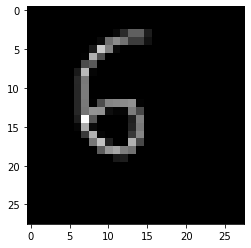

In [62]:
# image file 경로 설정
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, 'image.png')
# image file 읽기
cur_img = Image.open(img_path)
# 28*28로 resize
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)

try: 
  image = np.mean(image, axis=2)
except:
  pass

# upload한 images는 흰 배경에 검은 글씨로 되어 있으므로 MNIST data와 같이 검은 배경에 흰 글씨로 변경
image = np.abs(255-image)
# MNIST와 동일하게 data preprocessing(255로 나눔)
image = image.astype(np.float32)/255.
# 화면에 출력하여 확인
plt.imshow(image, cmap = 'gray')
plt.show()


In [65]:
image = torch.as_tensor(image).to(device).reshape(1, 1, 28, 28)
model.eval()
predict = model(image)
print('model이 예측한 값은 {} 입니다.'.format(predict.argmax(1).item()))


model이 예측한 값은 6 입니다.


# **4. Dataset / Dataloader**

* data를 처리하여 model에 공급하는 방법으로 Pytorch에서는 dataset과 dataloader를 제공
* dataset은 data와 label을 저장하고, dataloader는 dataset을 model에 공급할 수 있도록 iterable 객체로 감싸줌

### **FasionMNIST data 불러오기**

In [66]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as tr

In [67]:
training_data = datasets.FashionMNIST(
    root = "data",
    train=True,
    download=True,
    transform = ToTensor() # 텐서로 바꿔주면서 이미지를 0부터 1 사이의 값으로 변경
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



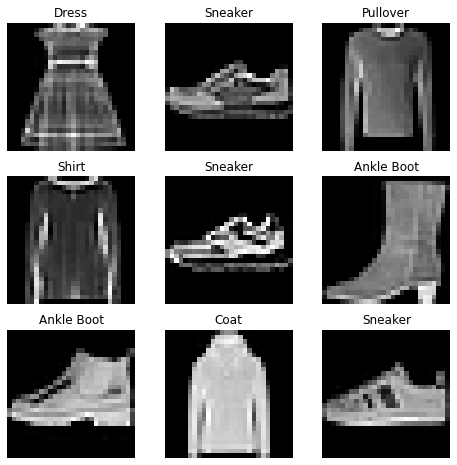

In [68]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap = 'gray') # squeeze: 채널(배치 데이터)을 없애줌, 28*28만 남기는 것
plt.show()

### **DataLoader 만들기**

In [70]:
# DataLoader 만들기 -> 데이터를 공급해주는 것
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


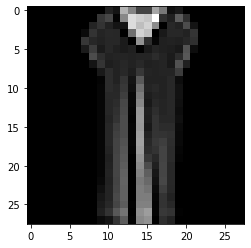

Label: 3


In [74]:
# DataLoader를 통해 반복하기(iterate)
# 이미지와 정답(label)을 표시함
train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label: {label}')

### **Model**

In [75]:
# device 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


### **Model class 만들기**

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten() # 데이터를 한 줄로 만든다.
    self.linear_relu_stack = nn.Sequential(
       nn.Linear(28*28, 128),
       nn.ReLU(),
       nn.Dropout(0.2), # 과적합 방지
       nn.Linear(128, 10) # dence와 같은 것
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits


In [76]:
# Model instance 생성, device 설정
model = NeuralNetwork().to(device)
print(model) # model.summary()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [78]:
# 가상의 data를 만들어서 예측해보기
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([1], device='cuda:0')


### **Training / Validation**

### **Loss Function**

In [79]:
# 손실 함수 초기화
loss_fn = nn.CrossEntropyLoss()

### **Optimizer**

머신러닝이나 딥러닝에서 모델을 설계할 때 하이퍼 파라미터(hyper parameter)를 최적화 시켜야 좋은 성능을 보여준다. 즉, 방식은 이상이 없는데 최적화 시키지 못해서 실패한 프로젝트가 수두룩 할지도 모른다. 

얼마나 진행할지 결정하는 에포크(Epoch), 내부 노드(뉴런) 수, 일정한 데이터를 버려서 오버피팅(Overfitting, 과적합)이 일어나지 않게 하는 드롭아웃(Dropout) 등등 모델을 생성할 때 수많은 파라미터를 조정하게 되는데 그 중에 가장 드라마틱하고 쉽게 바꿔주는 것이 옵티마이저이다.

-옵티마이저의 원리
옵티마이저는 학습 데이터(Train data)셋을 이용하여 모델을 학습 할 때 데이터의 실제 결과와 모델이 예측한 결과를 기반으로 잘 줄일 수 있게 만들어주는 역할을 한다.


In [80]:
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### **Training / Validation(Test) Function**

In [87]:
# Training을 위한 함수
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    # 예측(prediction)과 손실(loss) 계산
    pred = model(X)
    loss = loss_fn(pred, y)

    # 역전파
    # gradient값들을 backward를 해줄 때 계속 값을 더해주기 때문에 
    # 매번 loss.backward()를 호출할 때 초기설정을 매번 더해주므로 
    # 한 번의 학습이 끝나면 값을 0으로 초기화 해야 한다.
    optimizer.zero_grad() 
    loss.backward() # 역전파가 일어남
    optimizer.step() # 업데이트됨
    
    if batch % 100 == 0:
      loss, current = loss.item(), batch*len(X)
      print(f'loss: {loss:>7f} [{current:>5d}/{size:>5d}]')

# Test를 위한 함수
def test_loop(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  with torch.no_grad(): # 메모리 절약
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= size

  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}\n")

    

In [88]:
# 학습 진행하기
epochs = 10
for t in range(epochs):
  print(f'Epoch {t+1} \n---------------------')
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)
print('끝')

Epoch 1 
---------------------
loss: 2.316926 [    0/60000]
loss: 0.865646 [ 6400/60000]
loss: 0.908502 [12800/60000]
loss: 0.411267 [19200/60000]
loss: 0.605923 [25600/60000]
loss: 0.448399 [32000/60000]
loss: 0.527491 [38400/60000]
loss: 0.395526 [44800/60000]
loss: 0.518508 [51200/60000]
loss: 0.330817 [57600/60000]
Test Error: 
 Accuracy: 83.4%, Avg loss: 0.464920

Epoch 2 
---------------------
loss: 0.386332 [    0/60000]
loss: 0.465720 [ 6400/60000]
loss: 0.233879 [12800/60000]
loss: 0.402608 [19200/60000]
loss: 0.342026 [25600/60000]
loss: 0.494464 [32000/60000]
loss: 0.472092 [38400/60000]
loss: 0.401651 [44800/60000]
loss: 0.328920 [51200/60000]
loss: 0.344764 [57600/60000]
Test Error: 
 Accuracy: 84.5%, Avg loss: 0.437290

Epoch 3 
---------------------
loss: 0.427770 [    0/60000]
loss: 0.306867 [ 6400/60000]
loss: 0.224637 [12800/60000]
loss: 0.246939 [19200/60000]
loss: 0.297165 [25600/60000]
loss: 0.295371 [32000/60000]
loss: 0.468389 [38400/60000]
loss: 0.523532 [44800/

### **Model 저장하고 불러오기**

### **parameter만 저장하고 불러오기**

In [89]:
# 학습된 model parameter 저장
torch.save(model.state_dict(), 'model_weights.pth')

In [90]:
# 새 model instance를 생성, device 설정
model2 = NeuralNetwork().to(device)
print(model2)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [91]:
# test
model2.eval() # training을 하지 않음
test_loop(test_dataloader, model2, loss_fn)

Test Error: 
 Accuracy: 13.3%, Avg loss: 2.310532



In [92]:
# 저장한 parameter 불러오기
model2.load_state_dict(torch.load('model_weights.pth'))

<All keys matched successfully>

In [93]:
# test
model2.eval() # training을 하지 않음
test_loop(test_dataloader, model2, loss_fn)

Test Error: 
 Accuracy: 87.7%, Avg loss: 0.336059



### **model 전체를 저장하고 불러오기**

In [94]:
# 저장하기
torch.save(model, 'model.pth')

In [95]:
# 불러오기
model3 = torch.load('model.pth')

In [96]:
# test
model3.eval() # training을 하지 않음
test_loop(test_dataloader, model3, loss_fn)

Test Error: 
 Accuracy: 87.7%, Avg loss: 0.336059

